# Лабораторная работа №4. Линейные классификаторы
###### Выполнил студент группы ПВ202 Нехаенко Владимир
###### Вариант 9. Данные о смертности при сердечной недостаточности (heart_failure_clinical_records_dataset.csv)

In [240]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns=['time'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


## Выполним разбиение на два класса
###### Разбиение будем проводить по признаку летального исхода

In [241]:
labels = df['DEATH_EVENT']

## Выполним метод главных компонент для снижения размерности данных

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df.values
scaling = StandardScaler()
scaling.fit(y)
scaled_data = scaling.transform(y)
principal = PCA(n_components=2)
principal.fit(scaled_data)
data = principal.transform(scaled_data)

df = pd.DataFrame(data)
df['res'] = labels
df

,0,1,res
0,2.527686,0.892944,1
1,0.999480,-1.964394,1
2,2.960616,-0.890616,1
3,1.477577,0.385464,1
4,2.396324,3.232655,1
...,...,...,...
294,-0.269151,-1.254435,0
295,-1.206658,-0.335084,0
296,-3.606293,-0.029302,0
297,0.154998,-2.786278,0


#### Визуализация

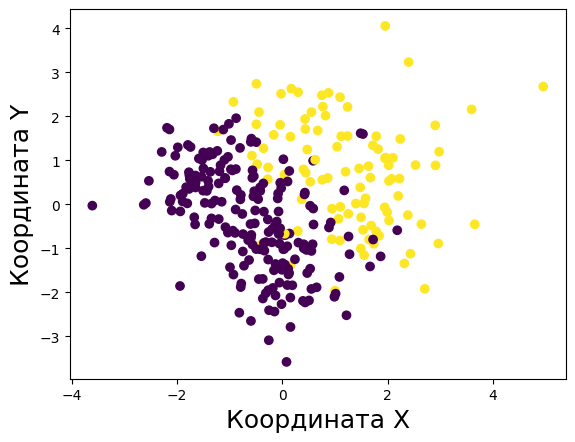

In [243]:
from matplotlib import pyplot as plt

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.xlabel('Координата X', fontsize=18)
plt.ylabel('Координата Y', fontsize = 18)
plt.show()

## Построение линейной дискриминантной функции Фишера

#### Разбиение датафрейма на 2 (по каждому классу)

In [244]:
df1 = df[df['res'] == 0]
df2 = df[df['res'] == 1]

df1 = df1.drop(columns='res', axis=1)
df2 = df2.drop(columns='res', axis=1)
df = df.drop(columns='res', axis=1)

#### Вычисление матрицы обратной к ковариационной

In [245]:
import numpy as np

a = df.cov()
b = np.linalg.inv(a)

print('Ковариационная матрица A')
print(a)
print('Обратная к ковариационной матрице B')
print(b)
print('Проверка: должна получиться единичная матрица')
print(a.dot(b))

Ковариационная матрица A
              0             1
0  1.739149e+00 -4.262064e-16
1 -4.262064e-16  1.632274e+00
Обратная к ковариационной матрице B
[[5.74993730e-01 1.50137813e-16]
 [1.50137813e-16 6.12642311e-01]]
Проверка: должна получиться единичная матрица
              0             1
0  1.000000e+00 -1.406396e-32
1 -8.871455e-33  1.000000e+00


#### Вычисление порога

In [246]:
mean_1 = df1.mean()
mean_2 = df2.mean()
m = mean_1 - mean_2

a = b.dot(m)
e1 = a.dot(mean_1)
e2 = a.dot(mean_2)

a_0 = (e1 + e2) / 2
a_0

-0.4652740463487989

#### Сравнение количества элементов ниже и выше порога

In [247]:
less = more = 0

for i in range(len(df)):
    if a.dot(df.iloc[i]) < a_0:
        less += 1
    else:
        more += 1

print(f"Ниже: {less}; Выше: {more};")

Ниже: 102; Выше: 197;


#### Построение функции

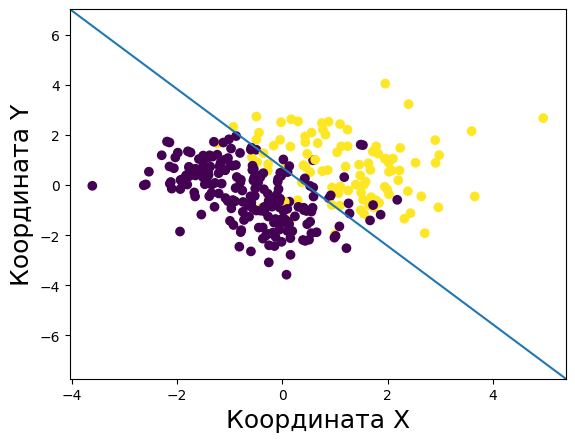

In [248]:
def y(x):
    return (a_0 - a[0] * x) / a[1]

x1, x2 = min(df.iloc[:, 0]), max(df.iloc[:, 0])
y1, y2 = y(x1), y(x2)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.axline((x1, y1), (x2, y2))
plt.xlabel('Координата X', fontsize=18)
plt.ylabel('Координата Y', fontsize = 18)
plt.show()

## Вывод

В ходе лабораторной работы, была построена линейная дискриминантная функция Фишера, для классификации на 2 класса.